## Twitter Sentiment & Loneliness Analysis during COVID-19


In [1]:
#Import Libraries
import pandas as pd #data-manipulation tool
from nltk.corpus import stopwords #remove stopwords
from nltk.tokenize import word_tokenize #extract syllabels
from nltk.stem import WordNetLemmatizer #convert the word into its base form
import re  #provide regular expression support
import networkx as nx 
import matplotlib.pyplot as plt  #visualization

In [2]:
#Uploading Lonliness dataset 
from google.colab import files
uploaded = files.upload()

Saving Loneliness Dataset.csv to Loneliness Dataset (1).csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import io 

df = pd.read_csv(io.StringIO(uploaded['Loneliness Dataset.csv'].decode('latin-1')))  # resolves unicode decode error & converts utf-8 into latin-1
df

,ID,Sentiment,Tweets
0,1,sad,wearing mask and stay away and following the i...
1,2,fear,let us quarantine the religious god's with in ...
2,2,sad,wajid khan the popular bollywood music directo...
3,3,anger,grumpy or dopey who wins the tonight by scarin...
4,3,fear,how about uco just go ahead and give me my deg...
...,...,...,...
9271,4097,joy,backhand_index_pointing_right face_with_monocl...
9272,4097,joy,the volunteers of orphans foundation pakistan ...
9273,4098,fear,this is the sign of hyper action that leads to...
9274,4098,fear,what worries me most these days me and a lot o...


**Text Preprocessing**

In [5]:
import nltk  #analyze text to find patterns(emotions)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
lemma = WordNetLemmatizer() #creating an instance of WordNetLemmatizer
stop_words = stopwords.words('english')

In [7]:
#function to preprocess the tweet
def text_prep(x):
     corp = str(x).lower() # converting the input string to lowercase
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() #extracting words using regular expressions
     tokens = word_tokenize(corp) #creating tokens 
     words = [t for t in tokens if t not in stop_words]  #removing stop words
     lemmatize = [lemma.lemmatize(w) for w in words]     #lemmatizing words
    
     return lemmatize

In [8]:
#applying text_prep()  function to every text in Tweet column
preprocess_tag = [text_prep(i) for i in df['Tweets']]
df["preprocess_txt"] = preprocess_tag

In [9]:
df["preprocess_txt"]

0       [wearing, mask, stay, away, following, instruc...
1       [let, u, quarantine, religious, god, house, co...
2       [wajid, khan, popular, bollywood, music, direc...
3       [grumpy, dopey, win, tonight, scaring, fuck, p...
4       [uco, go, ahead, give, degree, worry, corona, ...
                              ...                        
9271    [backhand, index, pointing, right, face, monoc...
9272    [volunteer, orphan, foundation, pakistan, dist...
9273    [sign, hyper, action, lead, hypertension, anxi...
9274    [worry, day, lot, people, matter, like, say, d...
9275    [salute, kindness, salute, work, thanks, join,...
Name: preprocess_txt, Length: 9276, dtype: object

In [10]:
#calculating the number of resultant words for each tweets
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))

In [11]:
file = open('/content/drive/MyDrive/negative-words.txt', 'r')  #file containing list of negative opinion words
neg_words = file.read()
file = open('/content/drive/MyDrive/positive-words.txt', 'r') #file containing list of positive opinion words
pos_words = file.read()

**Sentiment Score Calculation**

In [12]:
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))  
df['pos_count'] = num_pos     # counting number of positive words of each tweet
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg    # counting number of negative words of each tweet

In [13]:
#calculating the sentiment score of each tweet
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)

In [14]:
df

,ID,Sentiment,Tweets,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,1,sad,wearing mask and stay away and following the i...,"[wearing, mask, stay, away, following, instruc...",9,3,4,-0.11
1,2,fear,let us quarantine the religious god's with in ...,"[let, u, quarantine, religious, god, house, co...",14,5,8,-0.21
2,2,sad,wajid khan the popular bollywood music directo...,"[wajid, khan, popular, bollywood, music, direc...",15,2,5,-0.20
3,3,anger,grumpy or dopey who wins the tonight by scarin...,"[grumpy, dopey, win, tonight, scaring, fuck, p...",7,1,3,-0.29
4,3,fear,how about uco just go ahead and give me my deg...,"[uco, go, ahead, give, degree, worry, corona, ...",8,2,3,-0.12
...,...,...,...,...,...,...,...,...
9271,4097,joy,backhand_index_pointing_right face_with_monocl...,"[backhand, index, pointing, right, face, monoc...",26,2,3,-0.04
9272,4097,joy,the volunteers of orphans foundation pakistan ...,"[volunteer, orphan, foundation, pakistan, dist...",24,3,6,-0.12
9273,4098,fear,this is the sign of hyper action that leads to...,"[sign, hyper, action, lead, hypertension, anxi...",30,10,15,-0.17
9274,4098,fear,what worries me most these days me and a lot o...,"[worry, day, lot, people, matter, like, say, d...",18,5,10,-0.28


In [15]:
#removing the nan values
df2 = df.dropna()

In [16]:
df2

,ID,Sentiment,Tweets,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,1,sad,wearing mask and stay away and following the i...,"[wearing, mask, stay, away, following, instruc...",9,3,4,-0.11
1,2,fear,let us quarantine the religious god's with in ...,"[let, u, quarantine, religious, god, house, co...",14,5,8,-0.21
2,2,sad,wajid khan the popular bollywood music directo...,"[wajid, khan, popular, bollywood, music, direc...",15,2,5,-0.20
3,3,anger,grumpy or dopey who wins the tonight by scarin...,"[grumpy, dopey, win, tonight, scaring, fuck, p...",7,1,3,-0.29
4,3,fear,how about uco just go ahead and give me my deg...,"[uco, go, ahead, give, degree, worry, corona, ...",8,2,3,-0.12
...,...,...,...,...,...,...,...,...
9271,4097,joy,backhand_index_pointing_right face_with_monocl...,"[backhand, index, pointing, right, face, monoc...",26,2,3,-0.04
9272,4097,joy,the volunteers of orphans foundation pakistan ...,"[volunteer, orphan, foundation, pakistan, dist...",24,3,6,-0.12
9273,4098,fear,this is the sign of hyper action that leads to...,"[sign, hyper, action, lead, hypertension, anxi...",30,10,15,-0.17
9274,4098,fear,what worries me most these days me and a lot o...,"[worry, day, lot, people, matter, like, say, d...",18,5,10,-0.28


In [17]:
list_of_sent1 = list(df2['sentiment']) #extracting sentiment value from the dataframe
list_of_new_id = list(df2['ID'])       #extracting user IDs from the dataframe

In [18]:
len(list_of_sent1)

9264

In [19]:
len(list_of_new_id)

9264

In [20]:
#merging the lists of user IDs and their sentiment values
def merge_list(list1,list2):
  merge_list1 =  [(list1[i],list2[i]) for i in range(0,len(list1))]
  return merge_list1
tuple1 = merge_list(list_of_new_id,list_of_sent1)

In [21]:
tuple1

[(1, -0.11),
 (2, -0.21),
 (2, -0.2),
 (3, -0.29),
 (3, -0.12),
 (4, -0.2),
 (5, 0.0),
 (5, -0.05),
 (6, 0.0),
 (6, -0.17),
 (7, -0.08),
 (7, 0.15),
 (8, -0.33),
 (8, -0.18),
 (8, -0.18),
 (9, 0.0),
 (9, 0.0),
 (9, -0.17),
 (10, -0.03),
 (10, -0.26),
 (11, -0.33),
 (11, -0.22),
 (12, -0.17),
 (13, -0.15),
 (13, -0.06),
 (13, -0.29),
 (14, -0.2),
 (14, 0.0),
 (14, -0.2),
 (15, -0.35),
 (15, -0.19),
 (16, -0.17),
 (16, 0.0),
 (16, -0.12),
 (17, -0.25),
 (17, -0.17),
 (18, -0.28),
 (18, -0.11),
 (18, -0.12),
 (19, -0.09),
 (19, -0.1),
 (19, 0.0),
 (20, -0.08),
 (20, -0.43),
 (21, -0.43),
 (21, -0.08),
 (22, -0.11),
 (22, 0.25),
 (23, -0.31),
 (23, 0.0),
 (23, -0.27),
 (24, -0.41),
 (24, -0.17),
 (24, -0.25),
 (25, 0.18),
 (25, -0.2),
 (26, 0.33),
 (26, -0.38),
 (26, -0.26),
 (26, -0.71),
 (27, 0.0),
 (27, 0.08),
 (27, -0.6),
 (28, -0.1),
 (28, -0.14),
 (28, 0.14),
 (29, -0.14),
 (30, 0.33),
 (30, -0.04),
 (31, -0.21),
 (31, -0.27),
 (31, 0.0),
 (32, -0.18),
 (32, -0.06),
 (32, -0.27),
 (3

**Plotting Graphs**

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
graph_one = nx.Graph()   #creating null graph

1595018
True


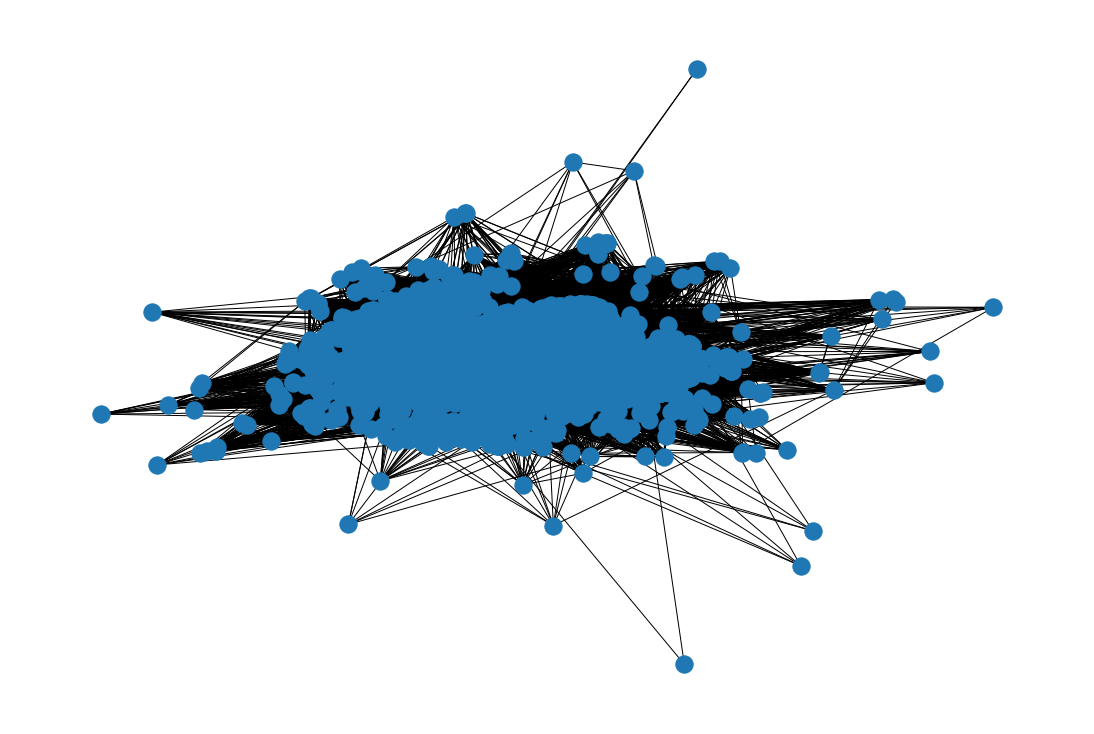

In [23]:
for x in tuple1:
  for y in tuple1:
    if x[1]==y[1] and x[0]!= y[0]:
      graph_one.add_edge(x[0],y[0])  #adding edges for same sentiment values between different user IDs
print(nx.number_of_edges(graph_one))
print(nx.is_connected(graph_one))
plt.figure(figsize=(15,10))
nx.draw(graph_one )

In [24]:
#finding minimum and maximum sentiment values among users 
max=0
min=0
for x in tuple1:
  if x[1] > max:
    max = x[1]
  elif x[1] < min :
    min = x[1]
print(min,max)

-1.0 1.0


In [25]:
neg_sent_id = [] 
neut_sent_id = []
pos_sent_id = []

In [26]:
#categorizing sentiments values
def padding(tuple):
  for x in tuple: 
    if x[1] >= -1.0  and x[1] < -0.1:  #range of negative sentiment value
      neg_sent_id.append(x[0]) 
    elif x[1] >= -0.1  and x[1] < 0.1 : #range of neutral sentiment value
      neut_sent_id.append(x[0]) 
    elif x[1] >= 0.1  and x[1] < 1.0:  #range of positive sentiment value
      pos_sent_id.append(x[0])
padding(tuple1) 

In [27]:
print("Negative Tweets:",len(neg_sent_id))
print("Neutral Tweets:",len(neut_sent_id))
print("Positive Tweets:",len(pos_sent_id))

Negative Tweets: 5210
Neutral Tweets: 3274
Positive Tweets: 768


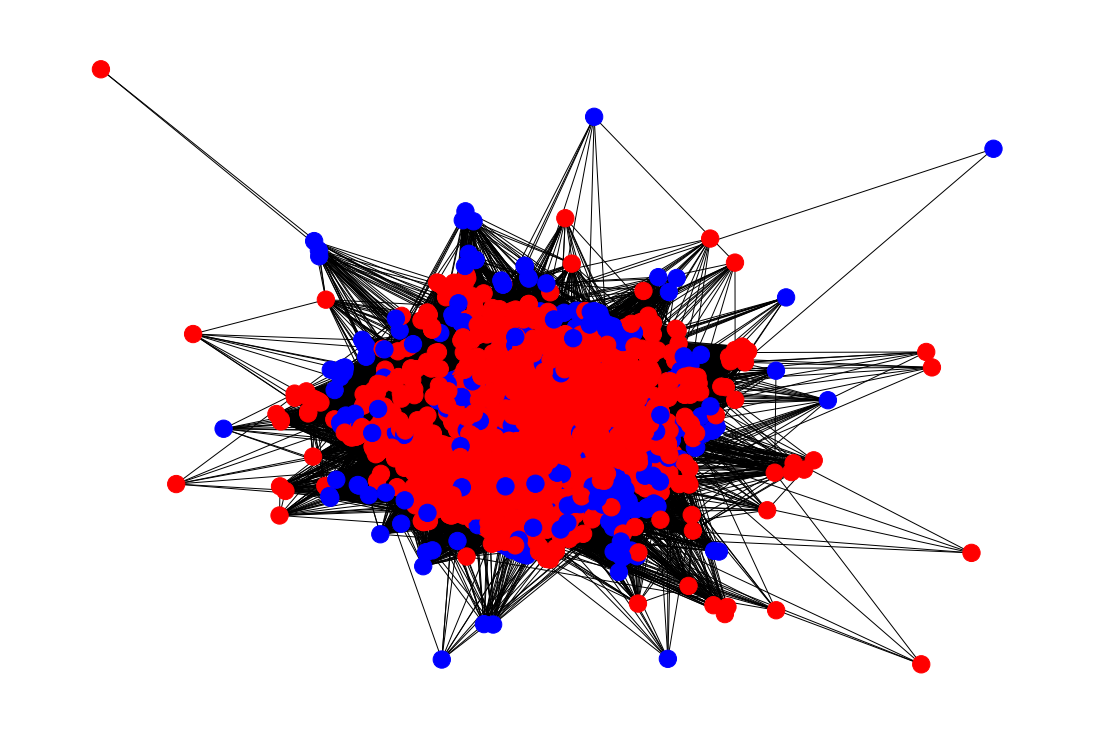

In [28]:
#plotting user with negative sentiment value
color_map1 = []
for n in graph_one.nodes():
  if n in neg_sent_id:
    color_map1.append('red')
  else:
    color_map1.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_one, node_color=color_map1, with_labels=False)
plt.show()  

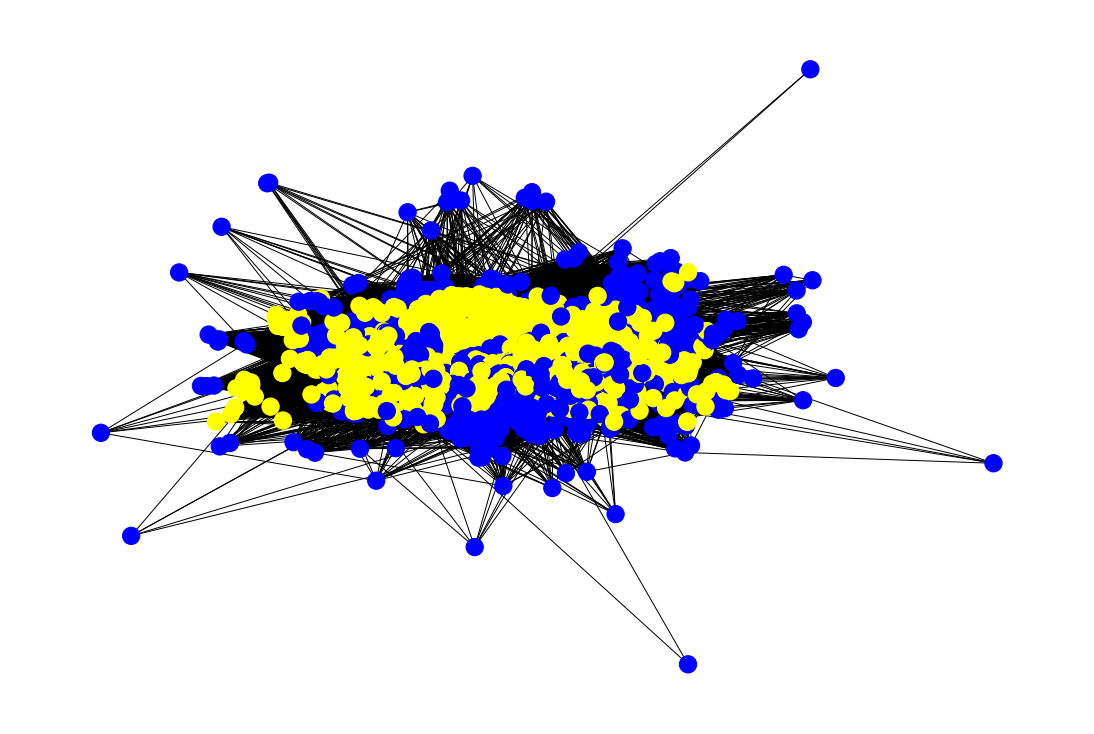

In [29]:
 #plotting user with neutral sentiment value
color_map2 = []
for n in graph_one.nodes():
  if n in neut_sent_id:
    color_map2.append('yellow')
  else:
    color_map2.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_one, node_color=color_map2, with_labels=False)
plt.show()

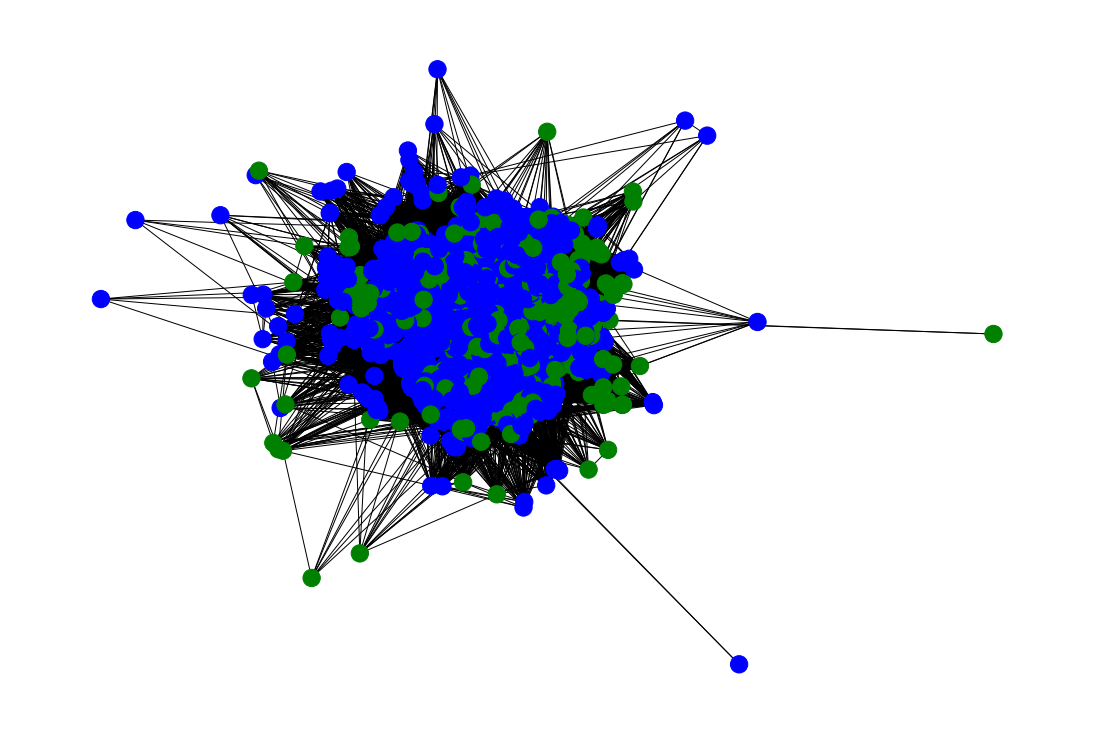

In [30]:
#plotting user with positive sentiment value
color_map3 = []
for n in graph_one.nodes():
  if n in pos_sent_id:
    color_map3.append('green')
  else:
    color_map3.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_one, node_color=color_map3, with_labels=False)
plt.show()

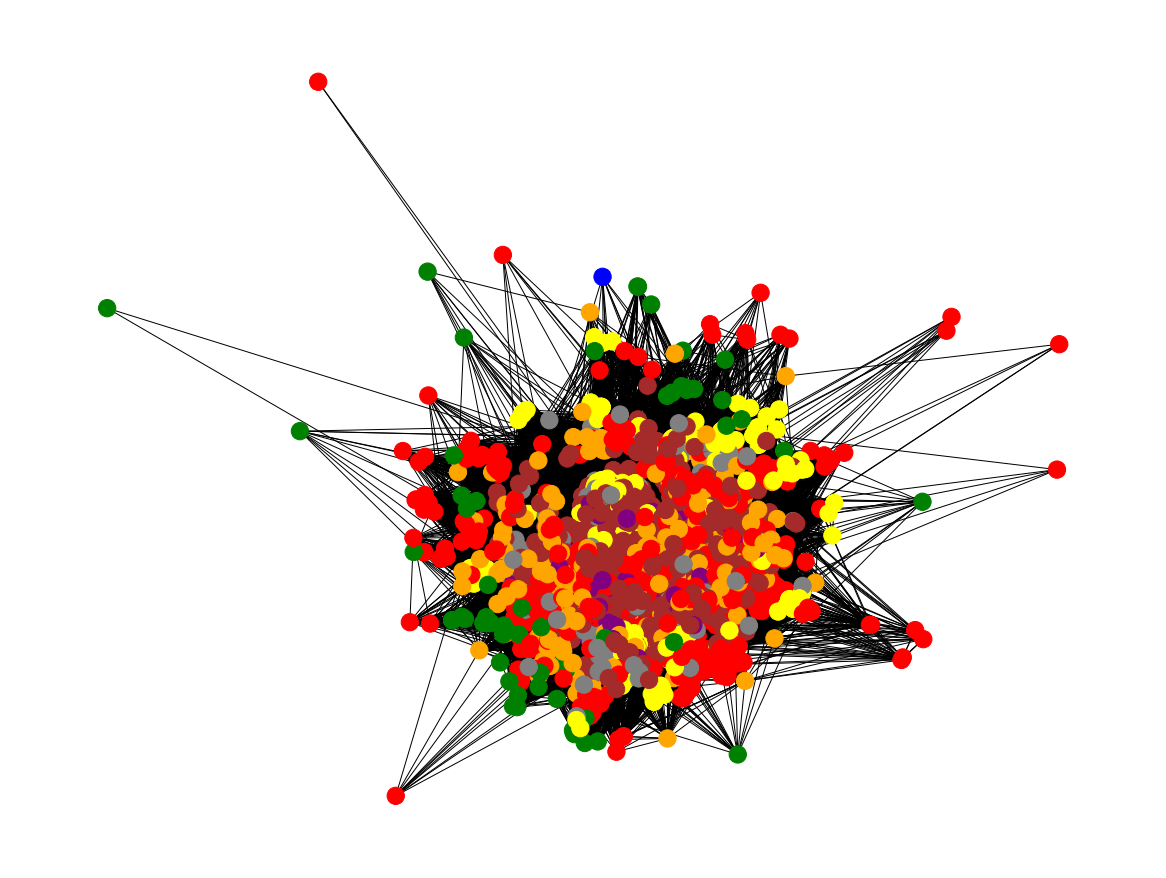

In [31]:
#plotting users based of combination of different sentiment values
color_map = []
for n in graph_one:
    if n in neg_sent_id and n not in neut_sent_id and n not in pos_sent_id:
        color_map.append('red') #Unique negative
    elif n not in neg_sent_id and n in neut_sent_id and n not in pos_sent_id:
        color_map.append('yellow') #Unique neutral
    elif n not in neg_sent_id and n not in neut_sent_id and n in pos_sent_id:
        color_map.append('green') #Unique positive
    elif n in neg_sent_id and n in neut_sent_id and n not in pos_sent_id:
        color_map.append('brown') #Negative and Neutral
    elif n in neg_sent_id and n not in neut_sent_id and n in pos_sent_id:
        color_map.append('orange') #Negative and Positive
    elif n not in neg_sent_id and n in neut_sent_id and n in pos_sent_id:
        color_map.append('grey') #Neutral Positive
    elif n in neg_sent_id and n in neut_sent_id and n in pos_sent_id:
        color_map.append('purple') #Negative Neutral Positive
    else:
      color_map.append('blue')      
plt.figure(figsize=(16,12))
nx.draw(graph_one, node_color=color_map, with_labels=False)
plt.show()

**Community Detection**

In [32]:
#importing libraries
from community import community_louvain
import numpy as np
import operator

In [33]:
# function for the community coloring
def comm_color(graph_name,comms):
  cmap = {
    0 : 'red',
    1 : 'green',
    2 : 'yellow', 
}
  node_cmap = [cmap[v] for _,v in comms.items()]   #assigning community color to each ID
  pos = nx.spring_layout(graph_name)
  plt.figure(figsize=(15,10))
  plt.show(nx.draw(graph_name, node_color=node_cmap))

In [34]:
# for the partition of community
def comm_part(graph_name):
  comms = community_louvain.best_partition(graph_name)
  return comms

In [35]:
#for finding the size of the community
def size_of_comm(comm):
  sorted_comm = sorted(comm.items(), key=operator.itemgetter(1))
  size_list_comm=[]
  c=0
  key = sorted_comm[0][1]
  for i in sorted_comm:
   if i[1] == key:
     c = c+1
   else :
     key = i[1]
     size_list_comm.append(c)  #appending number of users in a community 
     c=0
  return size_list_comm

{1: 0, 18: 0, 22: 0, 45: 0, 55: 0, 91: 0, 114: 0, 115: 0, 123: 0, 127: 0, 137: 0, 138: 1, 199: 1, 277: 0, 296: 0, 301: 0, 305: 0, 329: 0, 336: 2, 386: 0, 392: 0, 394: 1, 412: 0, 413: 0, 416: 0, 432: 0, 458: 0, 471: 2, 472: 0, 476: 0, 503: 0, 518: 1, 519: 0, 554: 0, 566: 0, 578: 1, 582: 0, 585: 0, 602: 1, 603: 0, 627: 0, 628: 0, 637: 0, 652: 0, 661: 0, 664: 0, 720: 0, 725: 0, 751: 0, 760: 2, 786: 0, 794: 1, 801: 0, 834: 1, 840: 0, 856: 0, 865: 0, 869: 0, 874: 0, 894: 0, 916: 0, 948: 0, 952: 2, 956: 1, 971: 0, 1014: 0, 1042: 0, 1066: 0, 1072: 0, 1080: 1, 1104: 1, 1114: 1, 1124: 0, 1145: 0, 1162: 0, 1181: 0, 1182: 0, 1191: 0, 1199: 0, 1202: 0, 1227: 0, 1246: 0, 1254: 0, 1266: 0, 1280: 1, 1299: 0, 1304: 0, 1306: 2, 1333: 0, 1345: 0, 1356: 1, 1409: 0, 1418: 0, 1421: 0, 1423: 0, 1448: 0, 1465: 0, 1466: 0, 1471: 0, 1474: 0, 1479: 0, 1483: 0, 1497: 0, 1503: 1, 1534: 1, 1561: 0, 1588: 0, 1596: 2, 1612: 0, 1624: 2, 1634: 0, 1636: 1, 1661: 0, 1667: 0, 1711: 0, 1739: 0, 1741: 0, 1742: 1, 1766: 0, 

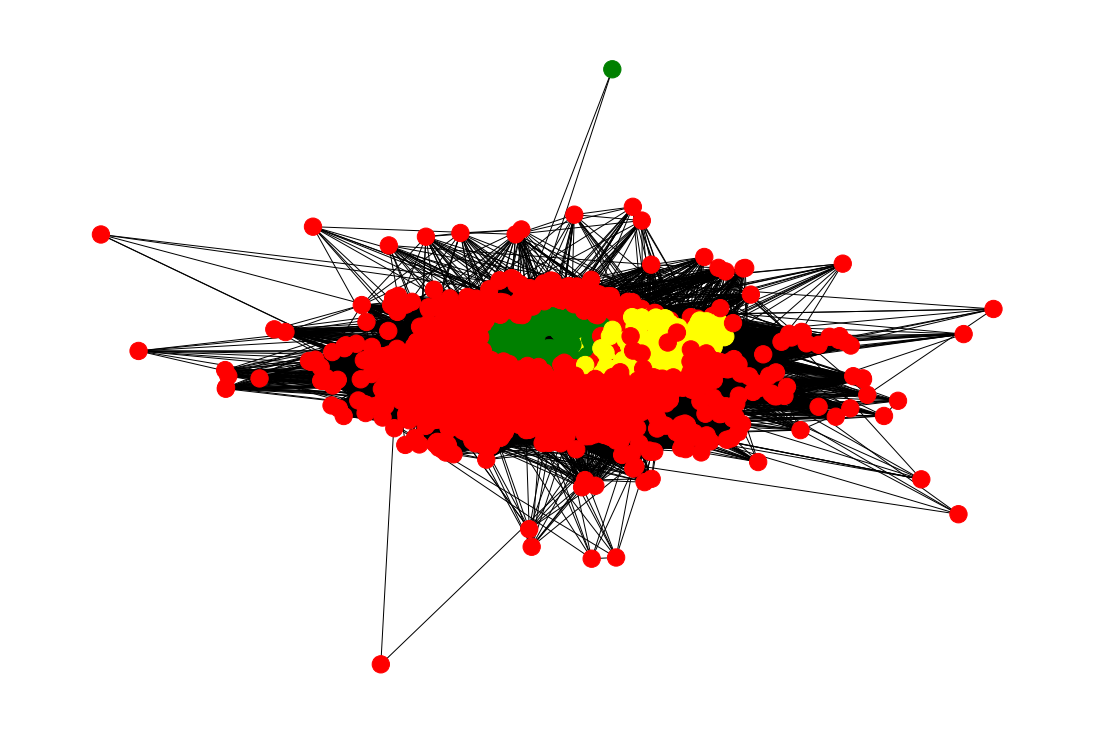

In [36]:
# Creating community
comm11 = comm_part(graph_one)
print(comm11)
size_list11 = size_of_comm(comm11)
print(size_list11)
comm_color(graph_one,comm11)

In [37]:
comm_1 = []#user IDs in community 2 
comm_2 = []#no community  values
comm_3 = []#user IDs in community 1
for i, y in comm11.items():
  if y == 1:
    comm_1.append(i)
  elif y == 2:
    comm_2.append(i)
  else:
    comm_3.append(i)

#sorted(comm_1)
#len(comm_3)

In [38]:
l = []
for i in tuple1:
  l.append(i[1])
sum(l) #total sentiment value of tuple1

-1201.6800000000023

In [39]:
comm_1_sent = []#Sentiment value of users in community 2 
comm_2_sent = []#no communities 
comm_3_sent = []#Sentiment value of users in community 1 
for i in tuple1:
  if i[0] in comm_1:
    comm_1_sent.append(i[1])
  elif i[0] in comm_2:
    comm_2_sent.append(i[1])
  else:
    comm_3_sent.append(i[1])

In [40]:
print('Neutral Community:', sum(comm_1_sent))  

Lonely Community: -268.4600000000002


In [41]:
print('No Community(Happy):', sum(comm_2_sent))


No Community(Happy): -153.58000000000018


In [42]:
print('Lonely Community',sum(comm_3_sent))

Neutral Community -779.6400000000046


In [43]:
#comm_1_sent

**Loneliness detection using Sentiment score**

In [44]:
list_of_tuple = []
for i in range(1,4101):
  list_of_tuple.append(i)

In [45]:
import math
sentiment_sum = []
for x in list_of_tuple:
  val = 0;
  for y in tuple1:
    if x == y[0]:
      val = val + y[1]
  sentiment_sum.append((x,round(val,2)))


In [46]:
sentiment_sum

[(1, -0.11),
 (2, -0.41),
 (3, -0.41),
 (4, -0.2),
 (5, -0.05),
 (6, -0.17),
 (7, 0.07),
 (8, -0.69),
 (9, -0.17),
 (10, -0.29),
 (11, -0.55),
 (12, -0.17),
 (13, -0.5),
 (14, -0.4),
 (15, -0.54),
 (16, -0.29),
 (17, -0.42),
 (18, -0.51),
 (19, -0.19),
 (20, -0.51),
 (21, -0.51),
 (22, 0.14),
 (23, -0.58),
 (24, -0.83),
 (25, -0.02),
 (26, -1.02),
 (27, -0.52),
 (28, -0.1),
 (29, -0.14),
 (30, 0.29),
 (31, -0.48),
 (32, -0.51),
 (33, 0.0),
 (34, -0.12),
 (35, 0.0),
 (36, -0.22),
 (37, -0.69),
 (38, -0.52),
 (39, -0.31),
 (40, -0.54),
 (41, -0.18),
 (42, 0.0),
 (43, -0.89),
 (44, -0.53),
 (45, -0.91),
 (46, -0.72),
 (47, -0.27),
 (48, 0.0),
 (49, -0.28),
 (50, -0.16),
 (51, -0.15),
 (52, -0.31),
 (53, -0.09),
 (54, -0.1),
 (55, -0.58),
 (56, -0.2),
 (57, -0.17),
 (58, -0.39),
 (59, -0.2),
 (60, 0.0),
 (61, -0.18),
 (62, -0.58),
 (63, -0.26),
 (64, -0.12),
 (65, -0.09),
 (66, 0.0),
 (67, -0.27),
 (68, -0.4),
 (69, -0.4),
 (70, -0.03),
 (71, -0.15),
 (72, -0.61),
 (73, 0.08),
 (74, -0.14)

In [47]:
graph_two = nx.Graph()

112929
False


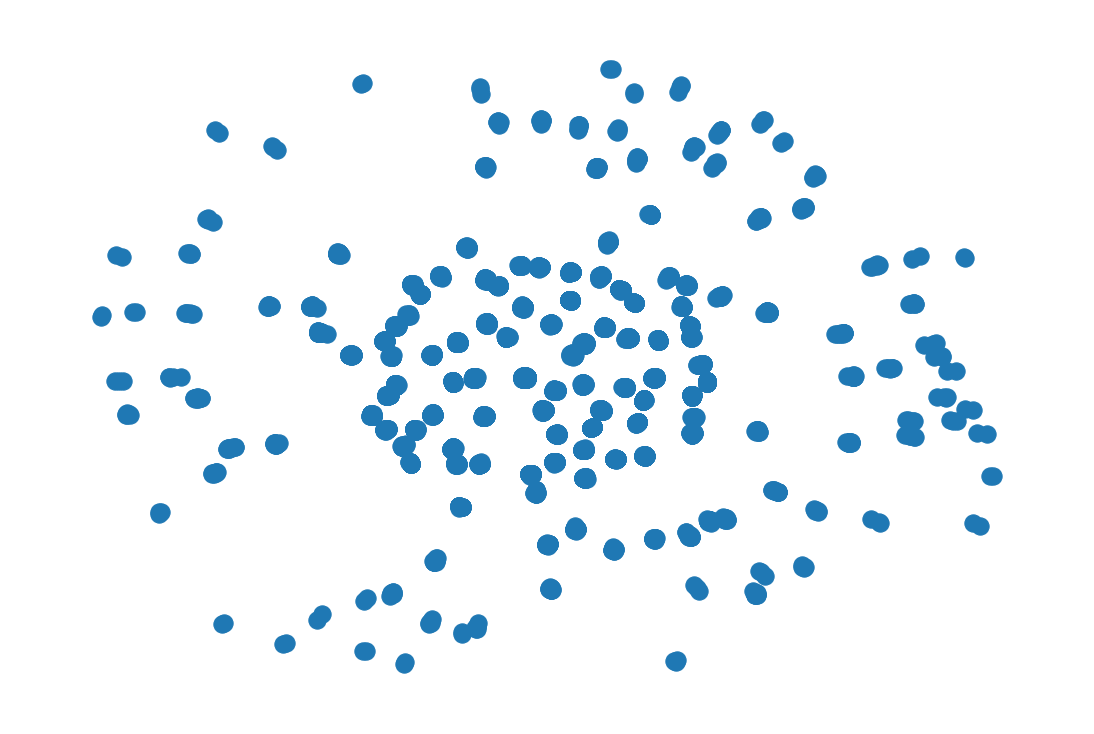

In [48]:
for x in sentiment_sum:
  for y in sentiment_sum:
    if x[1]==y[1] and x[0]!= y[0]:
      graph_two.add_edge(x[0],y[0])
print(nx.number_of_edges(graph_two))
print(nx.is_connected(graph_two))
plt.figure(figsize=(15,10))
nx.draw(graph_two, with_labels = False )

In [49]:
min = 0
max = 0
for x in sentiment_sum:
  if x[1] > max:
    max = x[1]
  elif x[1] < min:
    min = x[1]

In [50]:
print(min,max)

-1.63 1.2


In [51]:
list_of_l11 = []
list_of_l22 = []
list_of_l33 = []
list_of_l44 = []

In [52]:
def padding(tuple):
  for x in tuple: 
    if x[1] >= -1.6  and x[1] < -0.9:
      list_of_l11.append(x[0]) 
    elif x[1] >= -0.9  and x[1] < -0.1 :
      list_of_l22.append(x[0]) 
    elif x[1] >= -0.1  and x[1] < 0.2:
      list_of_l33.append(x[0])
    elif x[1] >= 0.2  and x[1] < 1.2:
      list_of_l44.append(x[0])
padding(sentiment_sum)

In [53]:
print("Lonely",len(list_of_l11))
print("Sad",len(list_of_l22))
print("Neutral",len(list_of_l33))
print("Happy",len(list_of_l44))

Lonely 107
Sad 2911
Neutral 940
Happy 140


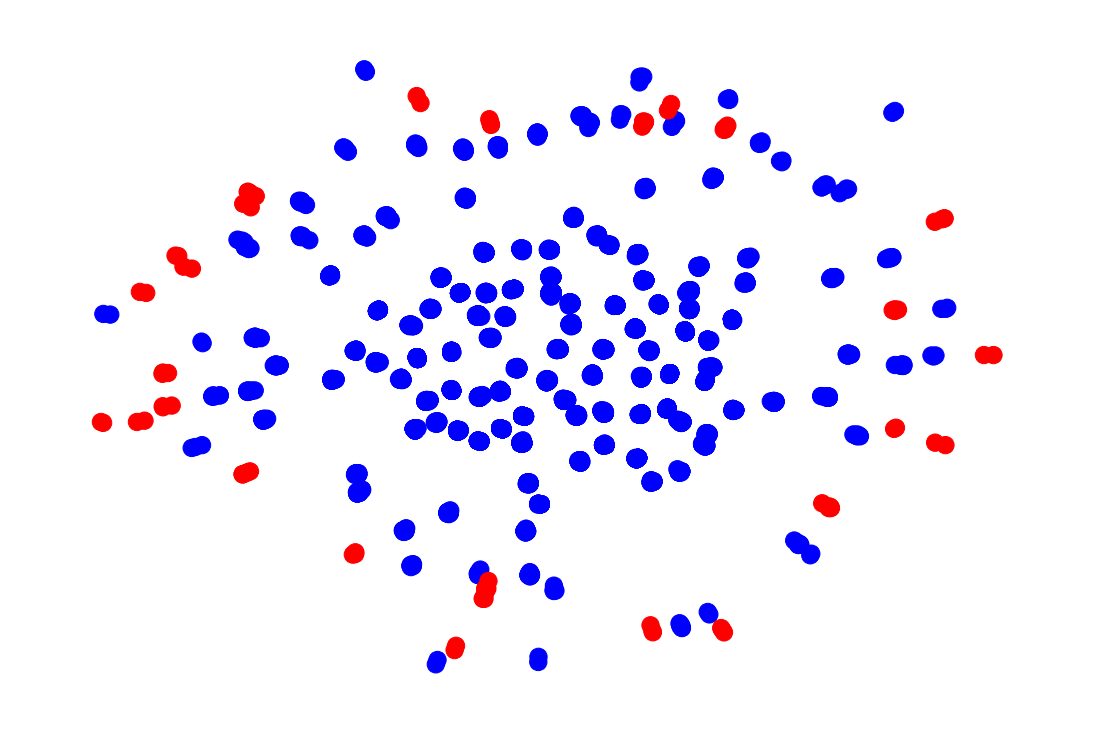

In [54]:
color_map1 = []
for n in graph_two.nodes():
  if n in list_of_l11:
    color_map1.append('red')
  else:
    color_map1.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_two, node_color=color_map1, with_labels=False)
plt.show()

In [55]:
#list of user ID lying in range of lonely sentiment values
print(*list_of_l11)

26 45 100 145 209 246 262 323 371 431 485 615 624 763 795 821 829 836 837 838 870 881 902 918 931 996 1029 1083 1093 1094 1102 1127 1175 1211 1236 1248 1260 1537 1538 1591 1625 1634 1664 1781 1853 1884 1968 2089 2123 2128 2199 2230 2324 2331 2339 2351 2363 2364 2407 2431 2446 2487 2530 2588 2670 2685 2706 2765 2856 2865 2955 2978 3034 3066 3139 3220 3221 3255 3273 3289 3304 3332 3366 3387 3389 3397 3440 3514 3570 3572 3576 3589 3605 3672 3723 3754 3759 3788 3833 3835 3918 3940 3941 4007 4008 4053 4075


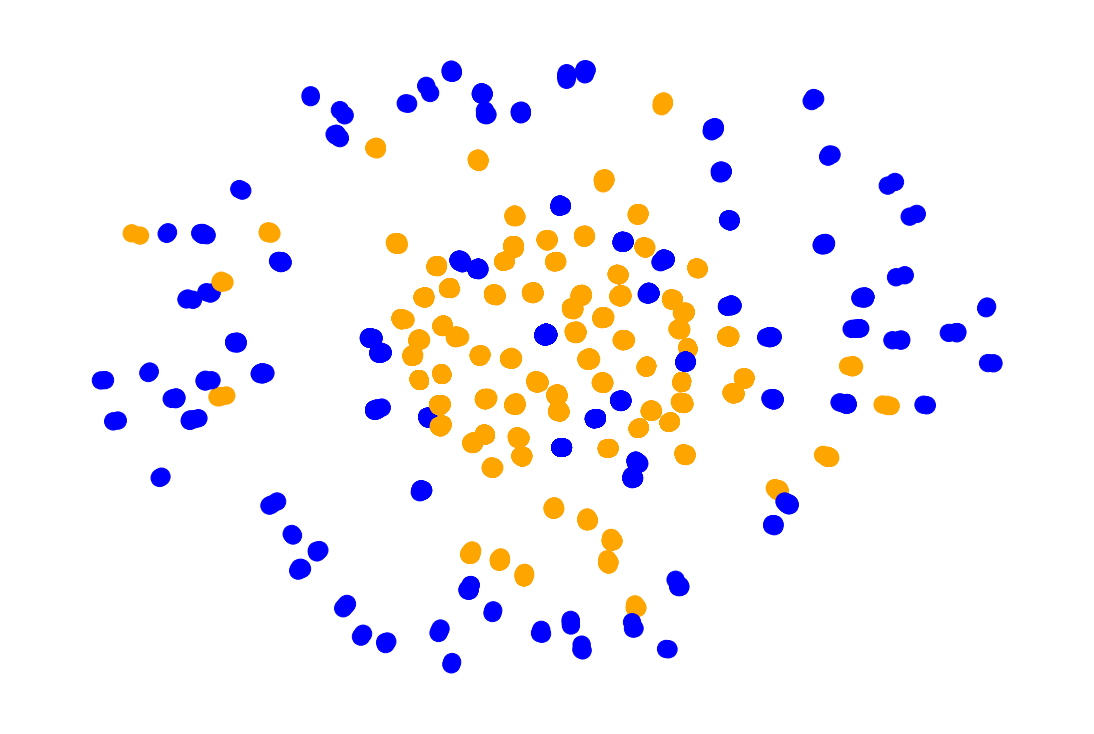

In [56]:
color_map2 = []
for n in graph_two.nodes():
  if n in list_of_l22:
    color_map2.append('orange')
  else:
    color_map2.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_two, node_color=color_map2, with_labels=False)
plt.show()

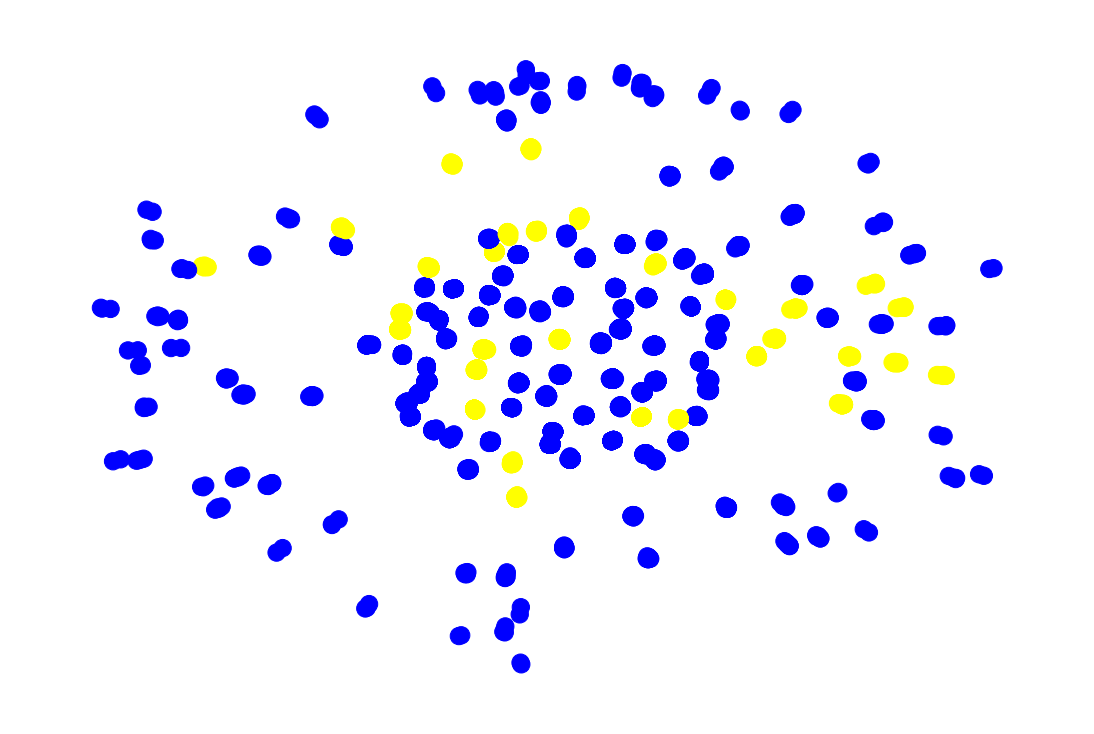

In [57]:
color_map3 = []
for n in graph_two.nodes():
  if n in list_of_l33:
    color_map3.append('yellow')
  else:
    color_map3.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_two, node_color=color_map3, with_labels=False)
plt.show()

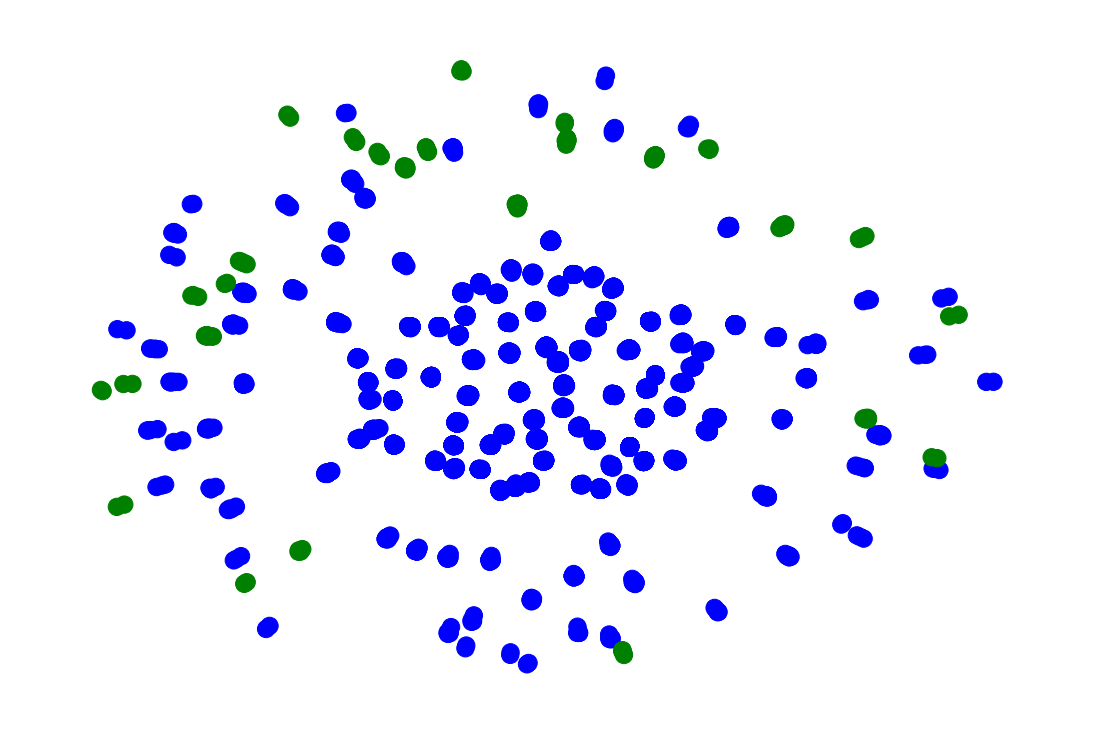

In [58]:
color_map4 = []
for n in graph_two.nodes():
  if n in list_of_l44:
    color_map4.append('green')
  else:
    color_map4.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_two, node_color=color_map4, with_labels=False)
plt.show()

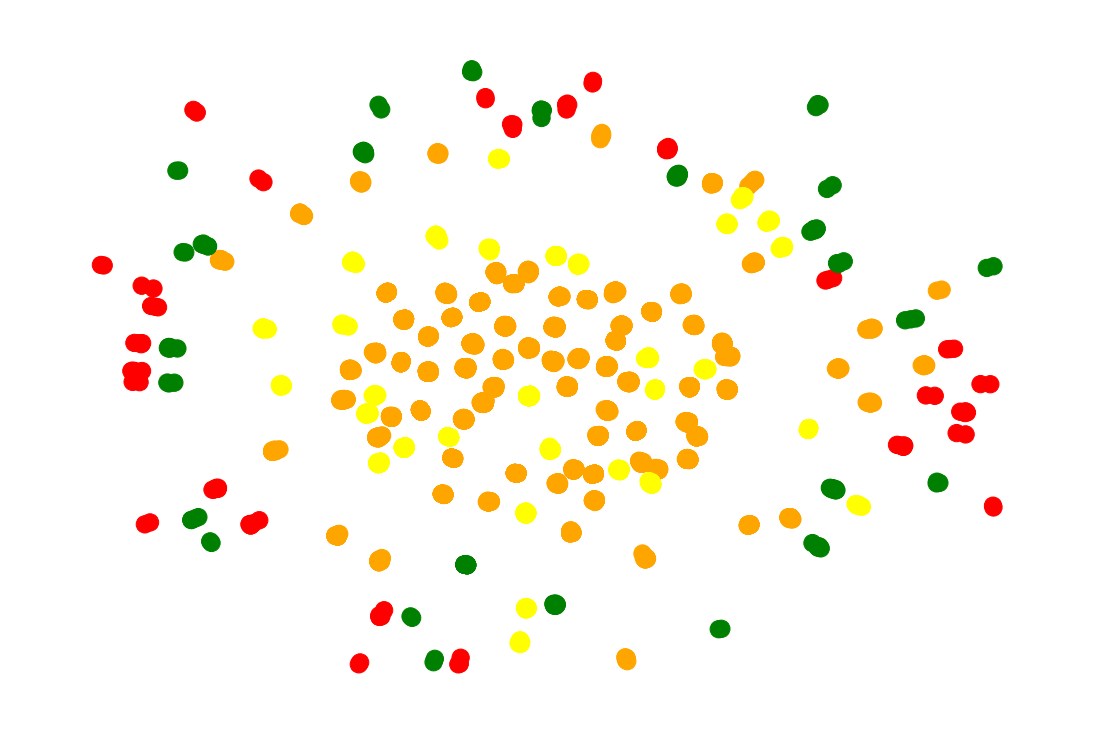

In [59]:
color_map5 =[]
for n in graph_two.nodes():
  if n in list_of_l11:
    color_map5.append('red')
  elif n in list_of_l22:
    color_map5.append('orange')
  elif n in list_of_l33:
    color_map5.append('yellow')
  elif n in list_of_l44:
    color_map5.append('green')
  else:
    color_map5.append('blue')

plt.figure(figsize=(15,10))
nx.draw(graph_two, node_color=color_map5, with_labels=False)
plt.show()